## Analysis of New York Green Taxis


* Read Data: Read data either directly from url (takes longer) OR from file (need to adjust file path)
* Map Visualization: I visualized the data using folium map in some questions. See these map visualizations in either way:
    * Run that block of code, but you are then required to run all blocks above
    * Just refer to the maps I submitted along with this notebook. Which maps to see are referred in corresponding blcoks


## Question 1 

In [1]:
import pandas as pd
import numpy as np
# read in data
taxiurl = "https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2015-09.csv"

#df = pd.read_csv(taxiurl,header=[0])
df = pd.read_csv("green_tripdata_2015-09.csv",header=[0])

# report the orginal data dimension 
r,c = df.shape
print("The original data has {} rows and {} columns".format(r,c))
print("The attributes are:")
print(df.columns.values)

The original data has 1494926 rows and 21 columns
The attributes are:
['VendorID' 'lpep_pickup_datetime' 'Lpep_dropoff_datetime'
 'Store_and_fwd_flag' 'RateCodeID' 'Pickup_longitude' 'Pickup_latitude'
 'Dropoff_longitude' 'Dropoff_latitude' 'Passenger_count' 'Trip_distance'
 'Fare_amount' 'Extra' 'MTA_tax' 'Tip_amount' 'Tolls_amount' 'Ehail_fee'
 'improvement_surcharge' 'Total_amount' 'Payment_type' 'Trip_type ']


#### split date and time for furthur analysis

In [2]:
# split date and time
df['pickTime'] = list(map(lambda x:x.split(" ")[1],df['lpep_pickup_datetime']))
df['pickDate'] = list(map(lambda x:x.split(" ")[0],df['lpep_pickup_datetime']))
df['dropTime'] = list(map(lambda x:x.split(" ")[1],df['Lpep_dropoff_datetime']))
df['dropDate'] = list(map(lambda x:x.split(" ")[0],df['Lpep_dropoff_datetime']))

# I have no information on vendors' qualities, therefore no preference 
# between vendors. Drop VendorID here as well
df.drop(['VendorID','lpep_pickup_datetime','Lpep_dropoff_datetime'],axis=1,inplace=True)
# report new data set dimension
r1,c1 = df.shape
print("The data has {} rows and {} columns".format(r1,c1))
print("The attributes are:")
print(df.columns.values)

The data has 1494926 rows and 22 columns
The attributes are:
['Store_and_fwd_flag' 'RateCodeID' 'Pickup_longitude' 'Pickup_latitude'
 'Dropoff_longitude' 'Dropoff_latitude' 'Passenger_count' 'Trip_distance'
 'Fare_amount' 'Extra' 'MTA_tax' 'Tip_amount' 'Tolls_amount' 'Ehail_fee'
 'improvement_surcharge' 'Total_amount' 'Payment_type' 'Trip_type '
 'pickTime' 'pickDate' 'dropTime' 'dropDate']


## Question 2

#### histogram of trip distance

In [3]:
import matplotlib.pyplot as plt

In [4]:
# first see the value range of Trip Distances
distances = list(df['Trip_distance'])
distances.sort(reverse=True)
print("The maxium distance is {} miles, and the minmum distance is {} miles".format(distances[0],distances[-1]))
# see how many trips having a distance beyond 100 miles
N = 0
for i,d in enumerate(distances):
    if d <100:
        N=i
        break
print("There are {} trips with distance more than 100 miles".format(N))

The maxium distance is 603.1 miles, and the minmum distance is 0.0 miles
There are 10 trips with distance more than 100 miles


All distances are valid (non-negative). 

However, we can see someone took a taxi from New York to as far as maybe Charlotte,NC (603.1 miles). Investigate this later. 


#### Histograms for trips within 100 miles

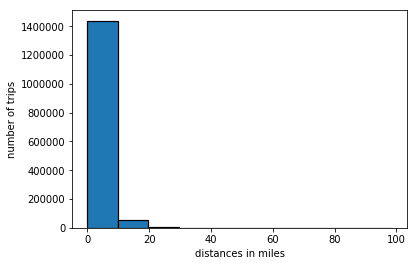

In [5]:
plt.hist(distances[N:],edgecolor='black', linewidth=1.2)
plt.xlabel("distances in miles")
plt.ylabel("number of trips")
plt.show()

We observe that most trips are with in 35 miles, so we narrow our histgram range

#### Histograms for trips within 35 miles

In [6]:
# see how many trips having a distance beyond 35 miles
N1 = 0
for i,d in enumerate(distances):
    if d <35:
        N1=i
        break
print("There are {} trips with distance more than 35 miles".format(N1))

There are 256 trips with distance more than 35 miles


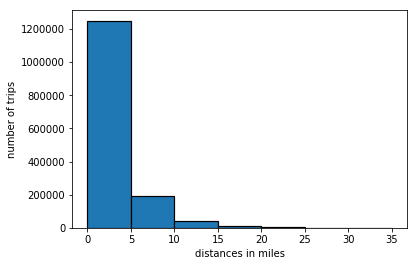

In [7]:
plt.hist(distances[N1:],edgecolor='black', linewidth=1.2,bins=np.arange(0,40,5))
plt.xlabel("distances in miles")
plt.ylabel("number of trips")
plt.show()

Again, we observed that most trips are condensed within 15 miles. We narrow our range again

#### Histograms for trips within 15 miles

In [8]:
# see how many trips having a distance beyond 15 miles
N2 = 0
for i,d in enumerate(distances):
    if d <15:
        N2=i
        break
print("There are {} trips with distance more than 15 miles".format(N2))

There are 14089 trips with distance more than 15 miles


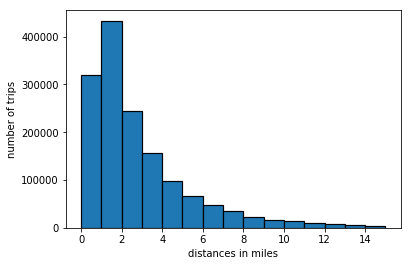

Mean: 2.8139316075975933, Median: 1.95


In [9]:
plt.hist(distances[N2:],edgecolor='black', linewidth=1.2,bins=np.arange(0,16,1))
plt.xlabel("distances in miles")
plt.ylabel("number of trips")
plt.show()
print("Mean: {}, Median: {}".format(np.mean(distances[N2:]),np.median(distances[N2:])))

After removing 14089 trips (~1%) with distances larger than 15 miles, we see the histogram above.
We conclude that ~99% of green taxis trips in Sep 2015 are within 15 miles of distances. Among thoese within 15 miles trips, the distribution is shown above. It is positively skewed with median 1.95 miles and mean 2.81 miles

### For those take a taxi for long distances (Anomaly Detection)

I feel interesting to investigate those who take a taxi for more than 100 miles (with extreme of 603.1 miles)

In [10]:
# add week day info in our data set
import datetime
df['pickW'] = list(map(lambda x:datetime.datetime.strptime(x,'%Y-%m-%d').strftime('%A'),df['pickDate']))
df['dropW'] = list(map(lambda x:datetime.datetime.strptime(x,'%Y-%m-%d').strftime('%A'),df['dropDate']))

In [11]:
# sub set of distance >100 miles
dfLong = df.loc[(df.Trip_distance>=100), ['pickDate','pickW','pickTime','Trip_distance','Tip_amount','Payment_type','Pickup_longitude','Pickup_latitude']]
dfLong.sort_values(by=['pickW'],inplace=True)

In [12]:
print(dfLong.to_string(index=False))

pickDate      pickW  pickTime  Trip_distance  Tip_amount  Payment_type  Pickup_longitude  Pickup_latitude
2015-09-11     Friday  17:22:50         120.13        0.00             2        -73.937775        40.800926
2015-09-18     Friday  20:21:27         100.74        0.00             2        -73.958954        40.819847
2015-09-19   Saturday  18:49:29         134.70      102.95             1        -73.961609        40.805958
2015-09-26   Saturday  17:23:52         108.62       18.08             1        -73.803436        40.677845
2015-09-27     Sunday  03:13:48         603.10        0.00             2        -73.937164        40.804386
2015-09-10   Thursday  21:15:00         246.28       77.44             1        -73.871719        40.771744
2015-09-22    Tuesday  10:30:53         105.65        0.00             2        -73.898193        40.749580
2015-09-29    Tuesday  10:45:52         112.60        0.00             1        -73.931129        40.693161
2015-09-29    Tuesday  17:01:1

The long distance pickups are in different days of a week and different time of a day. I faild to obtain patterns from the table above to see any special characteristics of these long trips. However, we can take a look at where these long trips were initiated. Were they around airports?

In [13]:
# Visualization using folium
# Please refer to map1.html if not running this block

import folium
longitude = list(dfLong['Pickup_longitude'])
latitude = list(dfLong['Pickup_latitude'])

fmap = folium.Map(location=[40.738, -73.98],zoom_start=12)

markers = [folium.Marker(location=[la,lo],popup='<i>{}</i>'.format(d)) for la,lo,d in zip(dfLong['Pickup_latitude'],dfLong['Pickup_longitude'],dfLong['Trip_distance'])]
for marker in markers:
    marker.add_to(fmap)
fmap.save("map1.html")# saved to map1.html
fmap


Click on points for trip distance

**(Refer to map1.html if not running this block to show visualization)**

From map1, we can see that 2 long distance trips are initialized around LGA airport, 1 around JFK, 2 from Brooklyn, 1in Bronx,and most surprisingly, **4 in upper Manhattan**. 

**My reasonable guess is that people live in upper Manhattan are more likely to initiate a long distance taxi travel (>100 miles)**, may be due to richness (since he/she spent 600 bucks for just a taxi)

Caution: We only analysis trips over 100 miles (only 10), the result is not statistically reliable. Given more time, we can re-define 50 miles, for example, to be a long distance travel. It will result in more observations, and perhaps more interest results.

## Question 3

#### group by hour of day

In [14]:
# add a 'hour' column to help group, the value is the pick up hour of that trip
df['hour'] = list(map(lambda x:x[:2],df['pickTime']))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Mean,3.115276,3.017347,3.046176,3.212945,3.526555,4.133474,4.055149,3.284394,3.04845,2.999105,2.944482,2.912015,2.903065,2.878294,2.864304,2.85704,2.779852,2.679114,2.653222,2.715597,2.777052,2.999189,3.185394,3.191538
Median,2.200000,2.120000,2.140000,2.200000,2.360000,2.900000,2.840000,2.170000,1.98000,1.960000,1.920000,1.880000,1.890000,1.840000,1.830000,1.81000,1.800000,1.780000,1.800000,1.850000,1.900000,2.030000,2.200000,2.220000


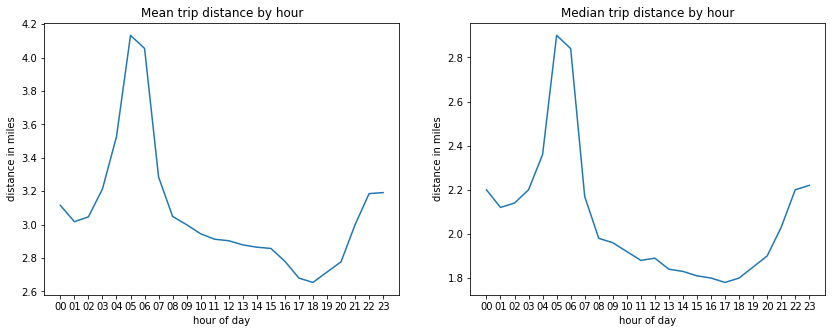

In [15]:
# group the dataframe by hour of a day
hourGroups = df.groupby(['hour'])
# get mean and median 
groupMean = np.array(hourGroups.mean()['Trip_distance'])
groupMedian = np.array(hourGroups.median()['Trip_distance'])
# report mean and median 
pd.set_option('display.max_columns', 30)
display(pd.DataFrame([groupMean,groupMedian],index=['Mean','Median']))

#plot 
plt.figure(figsize=[14,5])

plt.subplot(1,2,1)
plt.plot(hourGroups.mean()['Trip_distance'])
plt.title("Mean trip distance by hour")
plt.ylabel("distance in miles")
plt.xlabel("hour of day")

plt.subplot(1,2,2)
plt.plot(hourGroups.median()['Trip_distance'])
plt.title("Median trip distance by hour")
plt.ylabel("distance in miles")
plt.xlabel("hour of day")

plt.show()

We conclude that trips initiated early in the morning (4-5 a.m.) are more likely to cover long distances

### group by airports

There are three main airports serving New York City: La Guadia (LGA), John F. Kennedy International Airport (JFK) and Newark Airport (EWR). We add two columns into our dataframe:
* pickZone: L, J, E OR N (not airport)
* dropZone: L, J, E OR N (not airport)

Geographic projection is needed for such classification in our data. 

The pacakge I intended to use "pyproj" is not compatible in Python3, therefore, I wrote a python 2.7 file called "airportReader" to perform such function. I read in the result I generated using that file directly.

In [16]:
# read in results generated by airportReader
airport = pd.read_csv("airportCode.csv",header=0)
df['pickZone'] = airport['0']
df['dropZone'] = airport['1']

### For trips initiated from airports

In [17]:
# group data by pickZone
pickGroups = df.groupby(['pickZone'])

In [18]:
# report number of trips
display(pd.DataFrame(np.array(pickGroups.size()),index=['Newark','LGA','JFK','Not AirPort'],columns=['Total Trips']).T)

,Newark,LGA,JFK,Not AirPort
Total Trips,40,350,361,1494175


In [19]:
# Trip average amount for each airport
display(pd.DataFrame(np.array(pickGroups.mean()['Total_amount']),index=['Newark','LGA','JFK','Not AirPort'],columns=['Average fare']).T)

,Newark,LGA,JFK,Not AirPort
Average fare,75.01775,40.541,30.761745,15.020764


This makes sense because Newark is the farest airport from NYC, and LGA is the cloest

### For trips ended at airports

In [20]:
# group data by pickZone
dropGroups = df.groupby(['dropZone'])

In [21]:
# report number of trips
# Trip total amount for each airport
display(pd.DataFrame(np.array(dropGroups.size()),index=['Newark','LGA','JFK','Not AirPort'],columns=['Total Trips']).T)

,Newark,LGA,JFK,Not AirPort
Total Trips,698,13365,21292,1459571


Looks like JFK has the most arrivals

In [22]:
# Trip average amount for each airport
display(pd.DataFrame(np.array(dropGroups.mean()['Total_amount']),index=['Newark','LGA','JFK','Not AirPort'],columns=['Average fare']).T)

,Newark,LGA,JFK,Not AirPort
Average fare,97.864398,48.214816,26.534611,14.52089


### People at which airpots are more likely to take a taxi?
JFK has a much larger capacity than LGA, therefore, it is more than natural for it to has a larger number of taxi takers. However, on average, which people at which airport are more likely to takek a taxi?

I searched on the web https://www.panynj.gov/airports/traffic-statistics.html to find the total passangers in Sep, 2015:
* LGA:  2,340,430
* EWR:  3,036,938
* JFK:  4,778,774

Let's see on average, which airport are more taxi friendly

In [23]:
pL = 100*(pickGroups.size()['L'] + dropGroups.size()['L'])/2340430
pJ = 100*(pickGroups.size()['J'] + dropGroups.size()['J'])/4778774
pN = 100*(pickGroups.size()['E'] + dropGroups.size()['E'])/3036938
display(pd.DataFrame(np.array([pL,pJ,pN]),index=['LGA','JFK','EWR'],columns=['taxi percentage %']).T)

,LGA,JFK,EWR
taxi percentage %,0.925172,0.286998,0.024301


It looks like JFK is contributing a lot of taxi riders, but actually on average, people at LGA are more likely to take a taxi. I live in New York, and visited JFK and LGA several times. The reason might be that LGA has a very poor public transportation system. No subways. It will be far more convenient to take a taxi getting around LGA. For JFK, A and C subway lines goes directly there, the need of riding a taxi is low.

For Newwark,the average taxi percentage is low, but for each trip, driver earns a lot more

## Question 4

Think of some reasonable fetures that may explain tip percentage:
* Total fare amount 
 * Trip distance is for sure useful, but it is highly correlated with total amount. Actually total amount contains more information than trip distance. Trips cover long distances have high fare, but high fare trips do not need to be a long distance travel (maybe due to congestion). Therefore, I expect only one between distance and amount to be in models
* travel weekday
* pickup hour
* RateCodeID
* Pickzone. If it is from an airport, and which airport?

Note that besides Total fare amount, all variables are catogory. If they are fitted into like linear regression models, there will be too many dummy variables. Therefore, decision trees along with reandom forest might be suitable for this problem. However, before applying decision tree, I wish to build a very simple benchmark model. Then, to see can we do better with decision trees

We need to split the dataframe into train data and test data. A reasonable way is to use the last week of September as test data, and others as training data.
We also need to clean data with negative fare amount (no clue what they are), cash paid data (no tip info), and limite our analysis for trips within 15 miles

### clean data for modeling purpose

In [24]:
# create a copy of dataframe for modeling
dfModel = df.copy()

# add tip percentage: tipP in our data frame
dfModel['tipP'] = dfModel['Tip_amount']/dfModel['Total_amount']

# drop rows with negative amount
dfModel = dfModel.loc[(dfModel.Total_amount>=0),:]

# drop rows paid in cash, since tip info is not included for these records
dfModel = dfModel.loc[(dfModel.Payment_type==1),:]

# drop rows with trip distance more than 20 miles
dfModel = dfModel.loc[(dfModel.Trip_distance<=15),:]


In [25]:
# check the tip percentage range
print("The largest tip percentage is {}".format(max(dfModel['tipP'])))
print("The smallest tip percentage is {}".format(min(dfModel['tipP'])))

The largest tip percentage is 1.0
The smallest tip percentage is 0.0


TipP falls in the range of [0,1] as percentage requires. Howver, it is doubtful of giving 100% as tips (giving the same amount of total fare as tips). I suspect it might be some data entering errors (taking total amount as tips). I looked into the data dictionary table. The table says this info is provided directly from credit card companies, not manually entered. Therefore, I decided not to remove these observations. Another reason of not removing is that, if we remove observations with tipP=1.0, why not 0.95 or 0.9. Therefore, no removal is performed

In [26]:
# check the total amount range 
print("The largest total amount is {}".format(max(dfModel['Total_amount'])))
print("The smallest total amount is {}".format(min(dfModel['Total_amount'])))

The largest total amount is 490.0
The smallest total amount is 0.0


We have already removed trips longer than 15 miles. How total amount like 490 dollars possible? 
And why there are total amount 0?

In [27]:
display(dfModel.loc[(dfModel.Total_amount>400),:])

,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type,pickTime,pickDate,dropTime,dropDate,pickW,dropW,hour,pickZone,dropZone,tipP
16195,N,5,-73.916046,40.690800,-73.916054,40.690788,3,0.00,400.0,0.0,0.0,80.0,0.0,NaN,0.0,480.0,1,2.0,13:20:23,2015-09-01,13:25:39,2015-09-01,Tuesday,Tuesday,13,N,N,0.166667
16243,N,5,-73.916054,40.690777,-73.916046,40.690788,3,0.00,400.0,0.0,0.0,80.0,0.0,NaN,0.0,480.0,1,2.0,13:27:03,2015-09-01,13:27:16,2015-09-01,Tuesday,Tuesday,13,N,N,0.166667
140267,N,5,-73.800110,40.595432,-73.800125,40.595432,1,0.00,420.0,0.0,0.0,0.0,0.0,NaN,0.0,420.0,1,2.0,06:40:02,2015-09-04,06:44:52,2015-09-04,Friday,Friday,06,N,N,0.000000
862875,N,5,-74.012413,40.648067,-74.012428,40.648048,1,0.00,450.0,0.0,0.0,0.0,0.0,NaN,0.0,450.0,1,2.0,14:20:47,2015-09-18,14:20:52,2015-09-18,Friday,Friday,14,N,N,0.000000
865407,N,5,-73.921135,40.812397,-73.921112,40.812447,1,0.00,490.0,0.0,0.0,0.0,0.0,NaN,0.0,490.0,1,2.0,15:16:24,2015-09-18,15:24:13,2015-09-18,Friday,Friday,15,N,N,0.000000
865896,N,5,0.000000,0.000000,-73.895599,40.858383,1,0.00,475.0,0.0,0.0,0.0,0.0,NaN,0.0,475.0,1,2.0,15:47:05,2015-09-18,15:47:07,2015-09-18,Friday,Friday,15,N,N,0.000000
1163570,N,5,-73.750824,40.698738,-73.750809,40.698738,2,0.00,450.0,0.0,0.0,0.0,0.0,NaN,0.0,450.0,1,2.0,13:33:31,2015-09-24,13:34:21,2015-09-24,Thursday,Thursday,13,N,N,0.000000
1477297,N,5,-73.966339,40.632568,-73.967331,40.634377,1,0.06,400.0,0.0,0.0,80.0,0.0,NaN,0.0,480.0,1,2.0,17:32:20,2015-09-30,17:36:22,2015-09-30,Wednesday,Wednesday,17,N,N,0.166667
1482751,N,5,-73.953293,40.640816,-73.953392,40.640892,1,0.00,400.0,0.0,0.0,80.0,0.0,NaN,0.0,480.0,1,2.0,19:32:50,2015-09-30,20:17:53,2015-09-30,Wednesday,Wednesday,19,N,N,0.166667


We see that for these trips, the distance is not even recorded (0). Therefore, I guess for some long distance trips, driver and passenger aruged something out, instad of using meters.Therefore, I decided to model only trips having at leas 1 mile in record and fare at most 150 dollars and at least 10 dollars

In [28]:
# remove distance 0 records
dfModel = dfModel.loc[(dfModel.Trip_distance)>=1,:]

# remove total_fare greater than 150 dollars
dfModel = dfModel.loc[(dfModel.Total_amount)<=150,:]
# remove total_far less than 10 dollars
dfModel = dfModel.loc[(dfModel.Total_amount)>10,:]

Now the data should be suitable for modeling

### split data

As discussed above, we leave the last week in September as test data and use others as trainning data

In [29]:
# split data
dfTrain = dfModel.loc[(df.pickDate<="2015-09-23"),:]
dfTest = dfModel.loc[(df.pickDate>"2015-09-23"),:]

# data set size
nTrain = dfTrain.shape[0]
nTest = dfTest.shape[0]

### Tip percentage v.s. Total amount

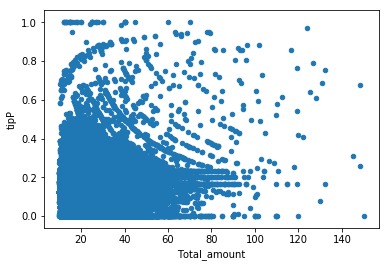

In [30]:
dfTrain.plot.scatter(x='Total_amount',y='tipP')

We can see some sort of upward trending, but the data is quite noisy. We have 12 dollars passanger giving 100% tips (that is reasonable as discussed above), and 145 dollars passanger giving no tips at all.

The most common range of tip percentages are from 0 to 0.4

### Tip percentage v.s. Trip distance

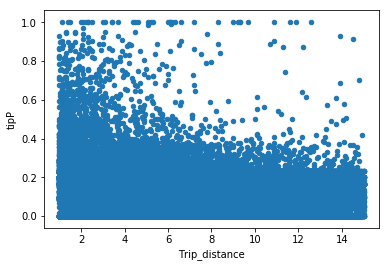

In [31]:
dfTrain.plot.scatter(x='Trip_distance',y='tipP')

The scatter plot gives us little information. As I expected, trip distance and total amount are highly correlated, but trip distance gives much less information than total amount. I decide to drop trip distance in future modelings

### Tip percentage v.s. PickZone

In [32]:
pickGroupsT = dfTrain.groupby(['pickZone'])

In [33]:
display(   pd.DataFrame(100*np.array(pickGroupsT.mean()['tipP']),index=['JFK','LGA','Not Airpott'],columns=['Average Tip Percent %']).T)

,JFK,LGA,Not Airpott
Average Tip Percent %,16.85456,14.407436,14.360372


JFK has a slightly higher (2.4%) average tip rate than other ares. LGA performs the same as Not airport trips

Newark drops out here after data cleaning

### Tip percentage v.s. DropZone

In [34]:
dropGroupsT = dfTrain.groupby(['dropZone'])
display(   pd.DataFrame(100*np.array(dropGroupsT.mean()['tipP']),index=['EWR','JFK','LGA','Not Airpott'],columns=['Average Tip Percent %']).T)

,EWR,JFK,LGA,Not Airpott
Average Tip Percent %,15.804993,14.484399,15.417028,14.327738


For trips terminated at airports, they more or less shows the same tip percentage

### Tip percentage v.s. pick hour

In [35]:
hourGroupsT = dfTrain.groupby(['hour'])
hours = np.arange(0,24,1)
display(   pd.DataFrame(100*np.array(hourGroupsT.mean()['tipP']),index=hours,columns=['Average Tip Percent %']).T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Average Tip Percent %,14.585226,14.477897,14.511658,14.249073,13.852118,13.812727,13.901986,13.882578,14.092005,14.40207,14.340772,14.314285,14.377037,14.340504,14.235048,14.224277,14.092467,14.137709,14.411313,14.518295,14.512049,14.606165,14.71148,14.494919


No sprcial characteristic here

### Tip percentage v.s. pick week day

In [36]:
weekGroupsT = dfTrain.groupby(['pickW'])
weeks = np.array(['M','Tu','W','Th','Fri','Sa','Sun'])
display(   pd.DataFrame(100*np.array(weekGroupsT.mean()['tipP']),index=weeks,columns=['Average Tip Percent %']).T)

,M,Tu,W,Th,Fri,Sa,Sun
Average Tip Percent %,14.253898,14.380675,14.423141,14.481317,14.308252,14.331744,14.335977


No sprcial characteristic here as well

### Predictive models 

Based on previous explorations, I propose two kinds of models.
* Benchmark Model: A simple linear regression model using total amount as the predictor
* Regression Decision trees and a regression random forest using total amount, pickZone (category), dropZone (category),pickhour (category), pick week day (category)

### Benchmark: Simple Linear regression

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# response tipP
y = np.array(dfTrain['tipP']).reshape(nTrain,1)
y_test = np.array(dfTest['tipP']).reshape(nTest,1)

# a simple linear regression as benchmark
x_SLR = np.array(dfTrain['Total_amount']).reshape(nTrain,1)
x_SLR_test = np.array(dfTest['Total_amount']).reshape(nTest,1)

reg = LinearRegression().fit(x_SLR,y)

# pridicted y in sample
y_SLR_P = reg.predict(x_SLR)

# preditced y out sampe
y_SLR_P_Test = reg.predict(x_SLR_test)

# in sample MSE
reg_inS = mean_squared_error(y,y_SLR_P)
# out sample MSE
reg_outS = mean_squared_error(y_test,y_SLR_P_Test)

print("In sample MSE: {}\nOut sample MSE: {}".format(reg_inS,reg_outS))


In sample MSE: 0.004745083020598088
Out sample MSE: 0.004744201692598821


We have an average of ~ 0..005/0.2 = 2.5% relative in sample error. The out sample MSE stays very similar as the in sample MSE. We use this simple linear regression as our benchmark model

### Decision Trees

In [38]:
# encode category variables
from sklearn import preprocessing

# category transformers 
les = [preprocessing.LabelEncoder() for i in range(4)]
categories = ['pickZone','dropZone','hour','pickW']

for i, cat in enumerate(categories):
    les[i].fit(dfTrain[cat])

In [39]:
from sklearn import tree
# begin to fit decision tree
depths = [3,4,5]
x_DT = np.array(list(le.transform(dfTrain[cat]) for le,cat in zip(les,categories))).T
x_DT_test = np.array(list(le.transform(dfTest[cat]) for le,cat in zip(les,categories))).T

DT_inS = []
DT_outS = []

for depth in depths:
    dTree = tree.DecisionTreeRegressor(max_depth=depth)
    dTree.fit(x_DT,y)
    
    # in sample prediction
    y_DT_P = dTree.predict(x_DT)
    # out sample prediction
    y_DT_P_T = dTree.predict(x_DT_test)
    
    # record in sample MSE
    DT_inS.append(mean_squared_error(y,y_DT_P))
    # record out sample MSE
    DT_outS.append(mean_squared_error(y_test,y_DT_P_T))

In [40]:
display(pd.DataFrame(np.array([DT_inS,DT_outS]),index = ['in sample MSE','out sample MSE'],columns=['depth 3','depth 4','depth 5']))

,depth 3,depth 4,depth 5
in sample MSE,0.004754,0.004752,0.004749
out sample MSE,0.004753,0.004752,0.004751


we can see that all these decision trees do not perform better than our bench mark model. Try if random forest renders better results

### Random Forest

In [41]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(max_depth=5,n_estimators=100)
forest.fit(x_DT,np.ravel(y))

# in sample prediction
y_FR_P = forest.predict(x_DT)
# out sample prediction
y_FR_P_T = forest.predict(x_DT_test)

# in sample MSE
FR_inS = mean_squared_error(np.ravel(y),y_FR_P)
# out sample MSE 
FR_outS = mean_squared_error(np.ravel(y_test),y_FR_P_T)

print("In sample MSE: {}\nOut sample MSE: {}".format(FR_inS,FR_outS))

In sample MSE: 0.0047479865420537665
Out sample MSE: 0.004750067688409457


The random forest model performs better than decision tree as expected.

### Model Comparison

In [42]:
# put MSE togeter
inS = [reg_inS]
inS.extend(list(DT_inS))
inS.append(FR_inS)

outS = [reg_outS]
outS.extend(list(DT_outS))
outS.append(FR_outS)

# report models summary
display(pd.DataFrame([inS,outS],index=["in sample MSE","out sample MSe"],columns=['Simple Linear Regression (benchmark)','decistion tree depth 3',
                                                                                 'decision tree depth 4','decision tree depth 5','random forest']))

,Simple Linear Regression (benchmark),decistion tree depth 3,decision tree depth 4,decision tree depth 5,random forest
in sample MSE,0.004745,0.004754,0.004752,0.004749,0.004748
out sample MSe,0.004744,0.004753,0.004752,0.004751,0.004750


Tree based model with more features do not provide us more infomation than a simple linear regression. Therefore I believe the simple linear regression model is the best among those models.

## Question 5

### Part C, Search

* This question is essentially a twisted version of the original Lloyd's algorithm (K-means). In stead of perfoming poits finding the nearest centroid in the original version, we want the centroid (pick-up location) to find nearest points.
* In my opinion, it's really hard if it is even possible to go faster than **O(n)** in time complexity, since we need to iterate over all of our observations, to determine the neares K points. I am going to implement a O(n) algorithm utilizing priority queue. Since I am using priority queue, the extra memory needed is just a array of K elements. 
* Although O(n) is the limit I believe for searching a data set, **O(logn)** can be possibly achived on the scale of data storage. For example, when the serve is not busy or the time when computing is cheap, we can perform K-means clustering on our whole data, and store each cluster with its centroid in leaves of a tree. When we choose a pick-up location, we iterate over all controids in leaves, find the nearest centroid, and read records from that leaf. If data in that leaf does not provide us enough observation, we read all data defined by its parent node.


In [52]:
# converting longitude and latitude into distance 
# https://www.movable-type.co.uk/scripts/latlong.html
'''
@param: plo: pointLongitude, pla: pointLatitude 
        clo: centroid(pick-up location) Longitude, cla: centroid Latitude
@return the distance between 2 points in 
'''
import math

def findDistance(plo,pla,clo,cla):
    R = 6371 # earth's mean radius
    delta_lo = plo - clo
    delta_la = pla - cla
    a = math.sin(delta_la/2)*math.sin(delta_la/2)  + math.cos(pla) * math.cos(cla)*math.sin(delta_lo/2)*math.sin(delta_lo/2)
    c = 2* math.atan2(math.sqrt(a),math.sqrt(1-a))
    d = R * c 
    return d



In [75]:
from operator import itemgetter
# function to search nearest k trips around pick-up location
'''
@param: k: the number of trip k to find
        h: time limit, in which hour (eg, h=5 means all trip from 5:00:00 to 5:59:59)
        clo: pick-up point longitude
        cla: pick-up point latitude
@return: a list of k elements, each elemtn is a tuple (index,distance)
'''
def findK(k,h,clo,cla):
    # a linkedlist to store tuple (index,distance)
    KN = []
   
    # add first k elments:
    for i, row in df[:k].iterrows():
        d = findDistance(row['Pickup_longitude'],row['Pickup_latitude'],clo,cla)
        KN.append((i,d))
    
    # maxmuin distance
    maxD = max(KN,key=itemgetter(1))
    maxID = KN.index(maxD)
    
    # iterate over the rest 
    for j, row in df[k:].iterrows():
        d = findDistance(row['Pickup_longitude'],row['Pickup_latitude'],clo,cla)
        # smallest than the largest, and time matches
        if d < maxD[1] and int(row['pickTime'].split(":")[0])==h:
            KN[maxID] = ((j,d))
            maxD = max(KN,key=itemgetter(1))
            maxID = KN.index(maxD)
    return KN
        
    
    
    

### Example:
Find 10 nearest trip between 19:00:00 to 19:59:59 around (-73.98,40.738)

In [76]:
KN = findK(10,19,-73.98,40.738)

In [78]:
display(df.iloc[list(map(lambda x:x[0],KN)),:])

,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type,pickTime,pickDate,dropTime,dropDate,pickW,dropW,hour,pickZone,dropZone
287016,N,1,-73.960030,40.742512,-73.942284,40.748692,4,1.30,7.0,0.0,0.5,1.95,0.00,NaN,0.3,9.75,1,1.0,19:37:43,2015-09-06,19:45:09,2015-09-06,Sunday,Sunday,19,N,N
230315,N,1,-73.959946,40.742794,-73.914864,40.749069,2,3.15,11.5,0.0,0.5,3.08,0.00,NaN,0.3,15.38,1,1.0,19:56:23,2015-09-05,20:07:31,2015-09-05,Saturday,Saturday,19,N,N
590641,N,1,-73.959763,40.733265,-73.996368,40.744434,1,6.60,29.0,0.0,0.5,1.00,0.00,NaN,0.3,30.80,1,1.0,19:44:08,2015-09-12,20:23:42,2015-09-12,Saturday,Saturday,19,N,N
469988,N,1,-73.960510,40.732475,-73.967575,40.696831,1,3.56,16.0,1.0,0.5,3.56,0.00,NaN,0.3,21.36,1,1.0,19:28:27,2015-09-10,19:50:39,2015-09-10,Thursday,Thursday,19,N,N
228445,N,1,-73.961281,40.731670,-73.947456,40.724854,1,1.12,6.5,0.0,0.5,2.19,0.00,NaN,0.3,9.49,1,1.0,19:19:10,2015-09-05,19:25:54,2015-09-05,Saturday,Saturday,19,N,N
1177918,N,1,-73.959969,40.742508,-73.912285,40.753696,6,2.82,28.0,1.0,0.5,0.00,0.00,NaN,0.3,29.80,2,1.0,19:39:32,2015-09-24,20:24:23,2015-09-24,Thursday,Thursday,19,N,N
471635,N,1,-73.959961,40.742294,-73.927734,40.763058,1,3.00,11.5,1.0,0.5,0.00,0.00,NaN,0.3,13.30,2,1.0,19:18:25,2015-09-10,19:30:32,2015-09-10,Thursday,Thursday,19,N,N
1396415,N,1,-73.959908,40.742371,-73.975189,40.741413,1,2.60,11.5,1.0,0.5,3.75,5.54,NaN,0.3,22.59,1,1.0,19:22:29,2015-09-28,19:36:37,2015-09-28,Monday,Monday,19,N,N
523795,N,1,-73.959991,40.742523,-73.927902,40.763142,1,2.98,12.5,1.0,0.5,2.86,0.00,NaN,0.3,17.16,1,1.0,19:57:03,2015-09-11,20:11:42,2015-09-11,Friday,Friday,19,N,N
1352858,N,1,-73.959969,40.742561,-73.944321,40.748959,1,1.50,9.0,0.0,0.5,1.95,0.00,NaN,0.3,11.75,1,1.0,19:52:33,2015-09-27,20:03:54,2015-09-27,Sunday,Sunday,19,N,N
